<a href="https://colab.research.google.com/github/JessicaIsabelle/Bootcamp-Data-Analytics-Womakers-Code/blob/main/AnaliseDeDados_PerformanceAlunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frequência e Medidas - Challenge**

O objetivo dessa análise é responder algumas perguntas sobre o perfil e notas obtidas pelos alunos. Os dados foram baixados do kaggle: https://www.kaggle.com/spscientist/students-performance-in-exams no formato de arquivo .csv.

Discionário das Variáveis:
*   ***gender*** - gênero do aluno
*   ***race/ethnicity*** - raça/etnia dos alunos
*   ***parental level of education*** - grau de escolaridade dos pais
*   ***lunch*** - tipo de almoço
*   ***test preparation course*** - indica se fez curso preparatório
*   ***math score*** - nota na prova de matematica
*   ***reading score*** - nota na prova de leitura
*   ***writing score*** - nota na prova de escrita



In [30]:
# Importando as bibliotecas usadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importando a base de dados
data = pd.read_csv("StudentsPerformance.csv")

In [5]:
# Verificando as primeiras linhas da base de dados
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [6]:
# Verificando o tamanho da base de dados
data.shape

(1000, 8)

In [7]:
# Verificando o tipo de variaveis
data.info()
# OBS: nesse caso não precisaremos modificar o tipo de nenhuma variável, pois todas estão no formato esperado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Verificando o nome das colunas
data.columns
# OBS: nesse caso podemos ver que os nomes das variáveis não estão em um bom padrão, tendo a presença de espaço e "/" nos nomes das variáveis. Por isso, o ideal é renomear as variáveis para um padrão adequado.

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
# Trocando os espaços e "/" por "_" no nome das variáveis
data.columns = data.columns.str.replace(" ", "_").str.replace("/","_")

In [11]:
# verificando os novos nomes das colunas
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### Idenfique as variáveis qualitativas e quantitativas.

In [12]:
# qualitativas: gender; race_ethnicity; parental_level_of_education; lunch; test_preparation_course
# quantitativas: math_score; reading_score; writing_score

### Alguma variável precisa ser alterada ou criada? Faça as alterações que julgar necessária.

In [15]:
# Não foi preciso alterar nenhuma variável, mas criei a varíavel "média_matérias" para indicar a média das matérias matemática, leitura e escrita. 
data['média_matérias']=(data['math_score']+data['reading_score']+data['writing_score'])/3
data.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,média_matérias
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


### Verifique a quantidade de alunos em cada grupo racial/étnico.

In [23]:
# Criando tabela de frequência da variável race/ethnicity e salvando em um dataframe
data_race=pd.crosstab( data['race_ethnicity'], "quantidade" ).reset_index()
data_race

col_0,race_ethnicity,quantidade
0,group A,89
1,group B,190
2,group C,319
3,group D,262
4,group E,140


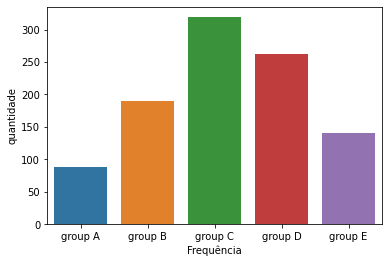

In [24]:
# Criando gráfico da quantidade de alunos por grupo racial
sns.barplot(x = "race_ethnicity", y = "quantidade", data = data_race)
plt.xlabel("Grupo racial/étnico")
plt.xlabel("Frequência")
plt.show()

### Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [ ]:
# tabela de frequência por gênero
pd.crosstab( data["gender"], "count" )
# Sim, tem mais alunos do sexo feminino.

col_0,count
gender,
female,518
male,482


### Qual o perfil com relação ao nível de estudo dos pais

In [26]:
pd.crosstab( data["parental_level_of_education"], "quantidade" ).sort_values("quantidade", ascending = False)
# Temos mais alunos com pais que possuem faculdade.

col_0,quantidade
parental_level_of_education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


### Analise as notas de matemática dos alunos de forma mais completa possível.

Dica: Identifique o tipo de variável e faça todas análises que você sabe que pode ser aplicado para esse tipo de variável. Por exemplo, se for uma variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma variável qualitativa faça a tabela de fequência, moda, etc.

OBS: Faça também análises gráficas.

In [27]:
# summarização da nota de matemática
data["math_score"].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

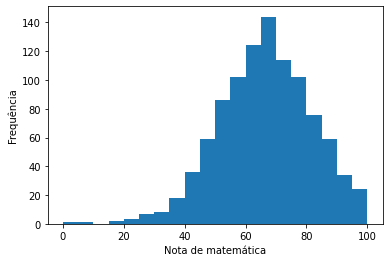

In [32]:
# análise gráfica das notas de matemática através de um histograma
plt.hist(data['math_score'], bins=20)
plt.xlabel( "Nota de matemática" )
plt.ylabel( "Frequência" )
plt.show()
# OBS: verificamos que as notas de matemática estão concentradas em torno de 70 e que a distribuição é assimétrica a esquerda

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


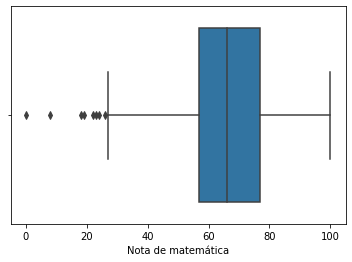

In [37]:
# análise gráfica das notas de matemática através de um boxplot
sns.boxplot( data["math_score"] )
plt.xlabel( "Nota de matemática" )
plt.show()
# Com o boxplot, observamos que os alunos tiram notas entre 60 e 80, e há outliers (notas menores que 25) mas que são pouco frequentes.

### Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais? Faça a mesma análise para as notas de leitura e escrita.

In [ ]:
# nota média de matemática segundo o grau de escolaridade dos pais
data.groupby(['parental_level_of_education'])['math_score'].mean()
#Os alunos com pais que possuem bachalerado e mestrado possuem notas maiores em matemática. Já os alunos que possuem pais com apenas ensino médio possuem notas menores.

parental_level_of_education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math_score, dtype: float64

In [47]:
# notas de matematica pelo grau de escolaridade dos pais
data_pivot = data.pivot(columns = "parental_level_of_education", values = "math_score")
data_pivot.head(3)

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,NaN,72.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,69.0,NaN
2,NaN,NaN,NaN,90.0,NaN,NaN


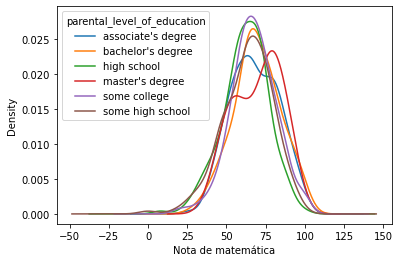

In [ ]:
# criando gráfico de densidade para comparar a distribuição das notas de matemática pelo grau de escolaridade dos pais
data_pivot.plot.density()
plt.xlabel( "Nota de matemática" )
plt.show()

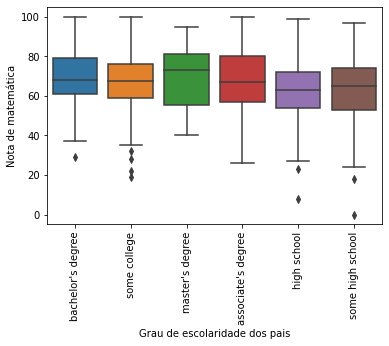

In [39]:
# criando boxplot para comparar a distribuição das notas de matemática pelo grau de escolaridade dos pais

sns.boxplot( x = "parental_level_of_education", y = "math_score", data = data )
plt.xticks( rotation = 90 )
plt.xlabel( "Grau de escolaridade dos pais" )
plt.ylabel( "Nota de matemática" )
plt.show()

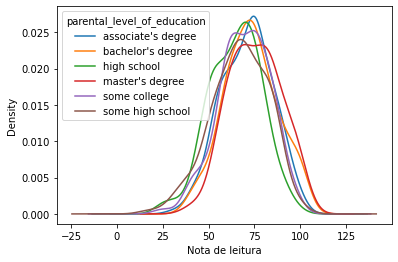

In [45]:
# notas de leitura pelo grau de escolaridade dos pais
data_pivot_reading = data.pivot(columns = "parental_level_of_education", values = "reading_score")
data_pivot_reading.plot.density()
plt.xlabel( "Nota de leitura" )
plt.show()

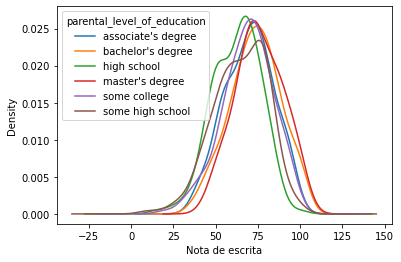

In [46]:
# notas de escrita pelo grau de escolaridade dos pais
data_pivot_writing = data.pivot(columns = "parental_level_of_education", values = "writing_score")
data_pivot_writing.plot.density()
plt.xlabel( "Nota de escrita" )
plt.show()

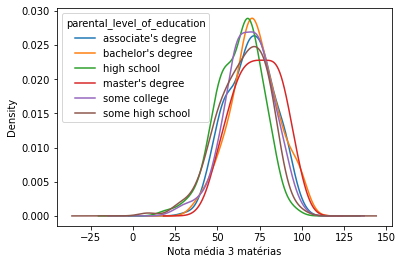

In [48]:
# nota média pelo grau de escolaridade dos pais
data_pivot_media = data.pivot(columns = "parental_level_of_education", values = "média_matérias")
data_pivot_media.plot.density()
plt.xlabel( "Nota média 3 matérias" )
plt.show()

In [50]:
# Nota média por sexo dos alunos
data.groupby(['gender']).mean()['média_matérias']


gender
female    69.569498
male      65.837483
Name: média_matérias, dtype: float64

### Verifique graficamente a relação da nota de leitura e de escrita.

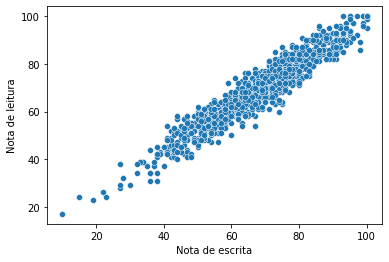

In [40]:
# gráfico de dispersão entre as notas de leitura e escrita
sns.scatterplot( data = data, x = "writing_score", y = "reading_score")
plt.xlabel( "Nota de escrita" )
plt.ylabel( "Nota de leitura" )
plt.show()
#Com o gráfico verificamos que quanto maior a nota de escrita, maior a nota de leitura e vice versa. Ambas são diretamente proporcionais. 

### Faça alguma outra análise que você ache pertinente.

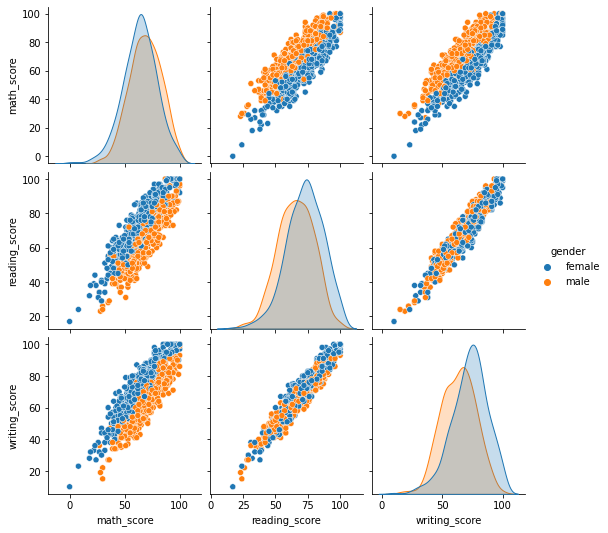

In [ ]:
# gráfico de dispersão comparativo entre as variáveis de nota, segregado pelo gênero
sns.pairplot( data[["math_score", "reading_score", "writing_score", "gender"]], hue = "gender" );

### CONCLUSÕES:
- Nossa base contém um total de 1000 alunos, sendo 518 do sexo feminino e 482 do sexo masculino. - Possui mais alunos de classe social C, correspondente a 32% do total e da classe D 26%.
- Com relação ao grau de escolaridade dos pais temos 38% com ensino médio e 23% com faculdade.
-  Os alunos com pais que possuem bachalerado e mestrado possuem notas maiores em matemática. Já os alunos que possuem pais com apenas ensino médio possuem notas menores.
- As notas de escrita e de leitura são diretamente proporcionais, ou seja quem ler muito geralmente tira maiores notas na escrita e vice versa. 
- Verificando a coluna criada "média_matérias" a tendência de alunos filhos de pais com mestrado permanece e  continuam obtendo as melhores notas. 
- As meninas possuem uma média das 3 notas igual a 69,5 e os meninos igual a 65,8.
- E por fim, identificamos que as meninas possuem notas maiores em leitura e escrita comparadas aos meninos. Já em matemática, a diferença é menor entre os sexos, e os meninos possuem uma nota levemente superior.
